In [0]:
# import some python libraries
import math
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

In [2]:
# So this is package that python (specifically matplotlib) uses to string together gifs.
# I really dont know too much about how it works.
!apt install imagemagick

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  fonts-droid-fallback fonts-noto-mono ghostscript gsfonts
  imagemagick-6-common imagemagick-6.q16 libcupsfilters1 libcupsimage2
  libdjvulibre-text libdjvulibre21 libgs9 libgs9-common libijs-0.35
  libjbig2dec0 liblqr-1-0 libmagickcore-6.q16-3 libmagickcore-6.q16-3-extra
  libmagickwand-6.q16-3 libnetpbm10 libwmf0.2-7 netpbm poppler-data
Suggested packages:
  fonts-noto ghostscript-x imagemagick-doc autotrace cups-bsd | lpr | lprng
  enscript gimp gnuplot grads hp2xx html2ps libwmf-bin mplayer povray radiance
  sane-utils texlive-base-bin transfig ufraw-batch inkscape libjxr-tools
  libwmf0.2-7-gtk poppler-utils fonts-japanese-mincho | fonts-ipafont-mincho
  fonts-japanese-gothic | fonts-ipafont-gothic fonts-arphic-ukai
  fonts-arphic-uming fonts-nanum
The following NEW packages will be installed:
  fonts-droid-fallback fonts-noto-mono g

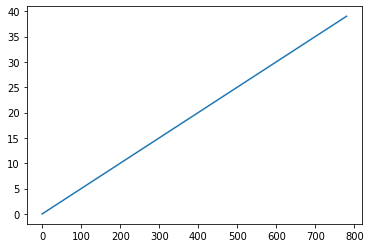

In [3]:
# maybe run through some simple stress strain relationships?
# super basic, stress strain equation. Nothing fancy. sigma is 
# stress, epsilon is strain and E is youngs modulus
def stress(E):
    epsilon = np.arange(40)
    sigma = E * epsilon
    
    plt.plot(sigma, epsilon)
    plt.show()
    
stress(20)

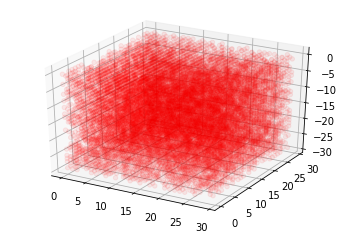

In [4]:
# set up a random 3D matrix
d = np.random.randint(0, 2, size=(30,30,30))
# Get the x y and z vectors from this 3D matrix
z,x,y = d.nonzero()

#plot a 3D graph! Easy Peasy!
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, -z, zdir='z', c= 'red', alpha = .07)
plt.show()

In [0]:
# Here you generate some dummy data then you store it in a Pandas data frame/
# dictionary
a = np.random.rand(2000, 3)
t = np.array([np.ones(100)*i for i in range(20)]).flatten()
df = pd.DataFrame({"time": t ,"x" : a[:,0], "y" : a[:,1], "z" : a[:,2]})

# Here you just plot one set of points at a time
def update_graph(num):
    data=df[df['time']==num]
    graph._offsets3d = (data.x, data.y, data.z)
    title.set_text('3D Test, time={}'.format(num))

# Set up the figure and plot for the animation
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d', alpha = .07)
title = ax.set_title('3D Test')

# Graph the first frame of the animation
data=df[df['time']==0]
graph = ax.scatter(data.x, data.y, data.z, alpha = .07)

# Start the animation process with this one line!
ani = matplotlib.animation.FuncAnimation(fig, update_graph, 9, 
                               interval=200, blit=False)
# Save the animation
ani.save('test.gif', writer='imagemagick')
# Show your animation
plt.show()

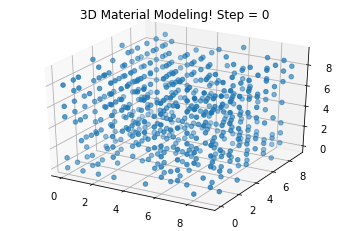

In [6]:
#set up our matrix
N = 10
Material = np.random.randint(0, 2, size = (N,N,N))
x, y, z = Material.nonzero()

#this function models how a defect moves through a materail
def material_shift():
    # Make a copy out of our matrix that 
    # we can make changes to
    N = 10
    global Material
    Movement = Material.copy()

    # do stuff i can explain to you. or not. life's short.
    # this is a basic switching algorithm - it doesn't do much 
    # since it was really meant as test.
    for i in range(N):
      for j in range(N):
        for k in range(N):
          if Material[(i-1)%N, j, k] == 0: 
            Movement[(i-1)%N, j, k], Movement[i,j,k] = 1, 0
          if Material[i, (j-1)%N, k] == 0:
            Movement[i, (j-1)%N, k], Movement[i,j,k] = 1, 0
          if Material[i, j, (k-1)%N] == 0:
            Movement[i, j, (k-1)%N], Movement[i,j,k] = 1, 0
          if Material[(i+1)%N, j, k] == 0:
            Movement[(i+1)%N, j, k], Movement[i,j,k] = 1, 0
          if Material[i, (j+1)%N, k] ==0:
            Movement[i, (j+1)%N, k], Movement[i,j,k] = 1, 0
          if Material[i, j, (k+1)%N] == 0:
            Movement[i, j, (k+1)%N], Movement[i,j,k] = 1, 0

    # ideally what i want to do here is create a sort of very basic
    # pathfinding algorithim that could model how a defect would move through
    # a material. But I'm going to have to research more of that and maybe we can 
    # talk about this during the group meeting on wed?
    '''
    for i in range(N):
      for j in range(N):
        for k in range(N):  
          if Material[i+1,j,k] == 0:
            Movement[i+1, j, k], Movement[i,j,k] = 1, 0
          if Material[i,j+1,k] == 0:
            Movement[i, j+1, k], Movement[i,j,k] = 1, 0
          if Material[i,j,k+1] == 0:
            Movement[i, j, k+1], Movement[i,j,k] = 1, 0
          if Material[i-1,j,k] == 0:
            Movement[i-1, j, k], Movement[i,j,k] = 1, 0
          if Material[i,j-1,k] == 0:
            Movement[i, j-1, k], Movement[i,j,k] = 1, 0
          if Material[i,j,k-1] == 0:
            Movement[i, j, k-1], Movement[i,j,k] = 1, 0
    '''
    # Finally update our old matrix
    Material = Movement
    # Done!
    return Material

# Here you just plot one set of points at a time
def updateGraph(num):
    data = material_shift()
    x, y, z = data.nonzero()
    Graph._offsets3d = (x, y, z)
    title.set_text('3D Material Modeling! Step = {}'.format(num))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
title = ax.set_title('3D Material Modeling!')

Graph = ax.scatter(x, y, z)

ani = matplotlib.animation.FuncAnimation(fig, updateGraph, frames=200, interval=200, blit=False)
ani.save('testable.gif', writer='imagemagick')
plt.show()